## Blanding and Pasting Image

<b>- Formula Blading Image
 - new pixel = alpha x pixel_1(1st image) + beta x pixel_2(2nd Image) + gamma

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.cvtColor(cv2.imread(r'C:\Users\Data\computer vision\dog_backpack.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(r'C:\Users\Data\computer vision\watermark_no_copy.png'), cv2.COLOR_BGR2RGB)

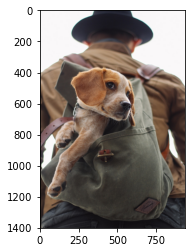

In [3]:
plt.imshow(img1)

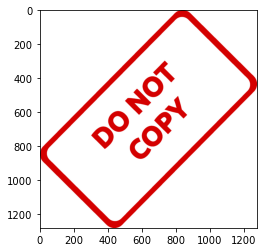

In [4]:
plt.imshow(img2)

In [5]:
print(img1.shape)
print(img2.shape)

(1401, 934, 3)
(1280, 1277, 3)


### Blanding Image of same size

In [6]:
img1 = cv2.resize(img1,(1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

In [7]:
print(img1.shape)
print(img2.shape)

(1200, 1200, 3)
(1200, 1200, 3)


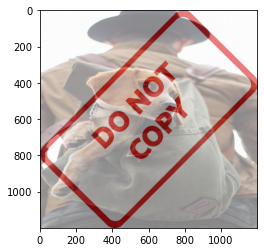

In [8]:
blanding = cv2.addWeighted(src1 = img1, alpha = 0.5,
                           src2 = img2, beta = 0.5, gamma = 0)

plt.imshow(blanding)

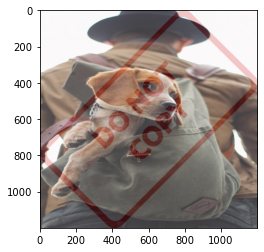

In [9]:
blanding =  cv2.addWeighted(img1, 0.8, 
                           img2, 0.2, 0)

plt.imshow(blanding)

### Overlay small image on top of larger image

In [10]:
img1 = cv2.cvtColor(cv2.imread(r'C:\Users\Data\computer vision\dog_backpack.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(r'C:\Users\Data\computer vision\watermark_no_copy.png'), cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2,(600,600))

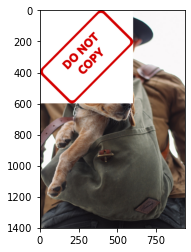

In [11]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

plt.imshow(large_img)

### Blend images of different sizes

In [12]:
img1 = cv2.cvtColor(cv2.imread(r'C:\Users\Data\computer vision\dog_backpack.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(r'C:\Users\Data\computer vision\watermark_no_copy.png'), cv2.COLOR_BGR2RGB)


img2 = cv2.resize(img2, (600,600))

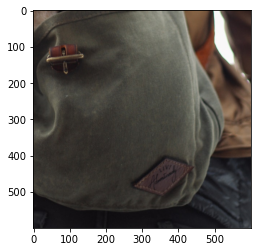

In [13]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]

rows, cols, images = img2.shape

roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[0]]

plt.imshow(roi)

### create masking

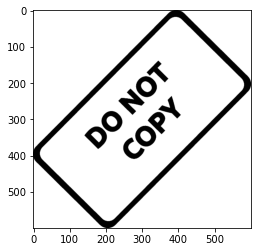

In [15]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) # gray scale image 
plt.imshow(img2gray, cmap='gray')

### bitwise_not

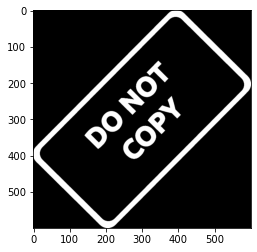

In [17]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

### Create white background

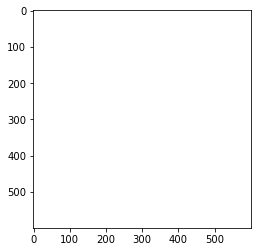

In [20]:
white_bgr = np.full(img2.shape, 255, dtype=np.uint8)
plt.imshow(white_bgr)

### bitwise_or

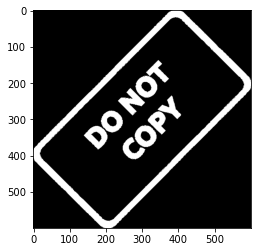

In [21]:
bit_or = cv2.bitwise_or(white_bgr,white_bgr, mask= mask_inv)
plt.imshow(bit_or)

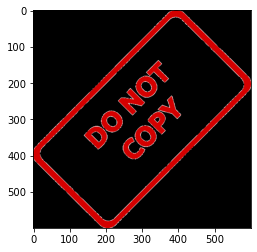

In [23]:
foreground = cv2.bitwise_or(img2,img2, mask = mask_inv )
plt.imshow(foreground)

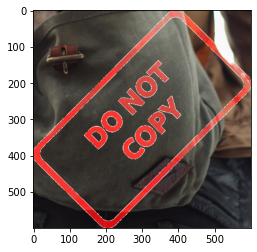

In [25]:
final_roi = cv2.bitwise_or(roi, foreground)
plt.imshow(final_roi)

In [27]:
large_img = img1
small_img = final_roi

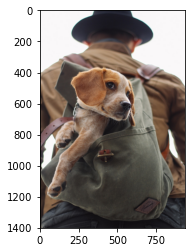

In [28]:
plt.imshow(large_img)

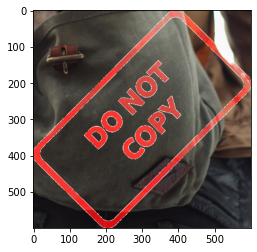

In [29]:
plt.imshow(small_img)

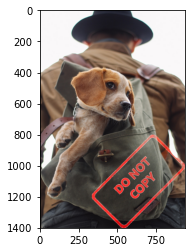

In [32]:
large_img = img1
small_img = final_roi

large_img [y_offset : y_offset + small_img.shape[0], x_offset: x_offset + small_img.shape[0]] = small_img

plt.imshow(large_img)